In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib inline

In [2]:
movies=pd.read_csv("fandango_score_comparison.csv")

In [3]:
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


(0, 5)

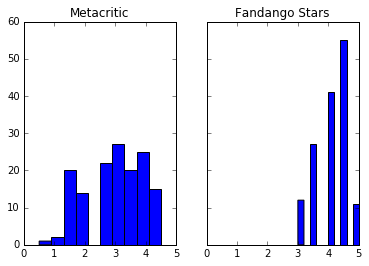

In [11]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True)

ax1.hist(movies["Metacritic_norm_round"])
ax1.set_title('Metacritic')
ax1.set_xlim((0,5))
ax2.hist(movies["Fandango_Stars"])
ax2.set_title("Fandango Stars")
ax2.set_xlim((0,5))

From above, we can see that Fandago reviews are highly skewed towards the higher scores; all scores are above 3. Metacritic has a more uniform distribution. 

In [20]:
Fmean,Mmean=movies["Fandango_Stars"].mean(),\
                   movies["Metacritic_norm_round"].mean()

In [21]:
Fmedian,Mmedian=movies["Fandango_Stars"].median(),\
                   movies["Metacritic_norm_round"].median()

In [22]:
Fstd,Mstd=np.std(movies["Fandango_Stars"]),\
        np.std(movies["Metacritic_norm_round"])

In [23]:
print(Fmean,Mmean,Fmedian,Mmedian,Fstd,Mstd)

4.08904109589 2.97260273973 4.0 3.0 0.53853216127 0.987561029704


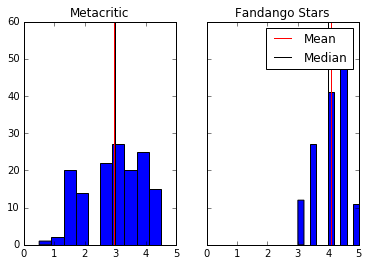

In [32]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True)

ax1.hist(movies["Metacritic_norm_round"])
ax1.set_title('Metacritic')
ax1.axvline(Mmean,color='r')
ax1.axvline(Mmedian,color='k')
ax1.set_xlim((0,5))
ax2.hist(movies["Fandango_Stars"],label=None)
ax2.set_title("Fandango Stars")
ax2.set_xlim((0,5))
ax2.axvline(Fmean,color='r',label='Mean')
ax2.axvline(Fmedian,color='k',label='Median')
ax2.legend()

* The Fandango rating system is apparently flawed: the rating only ranges from 3-5, and all the numbers are only rounded up to the nearest half-stars, never rounded down. For example, a 4.1 star will be rounded up to 4.5 
* The mean in Fandango is also larger than the median, because there are quite a few large values that skew the distribution heavily towards the right. 
* The standard deviation of Fandango stars is much smaller than that of the Metacritics, because Fandango has a smaller range of numbers (3-5). 
* Fandango's mean is also much higher because it's heavily biased. 

In [33]:
F, M = movies["Fandango_Stars"],movies["Metacritic_norm_round"]

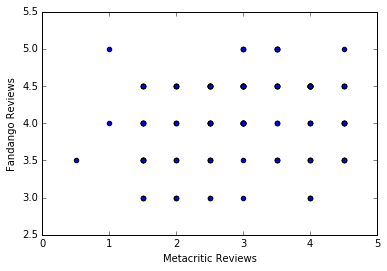

In [35]:
plt.scatter(M,F)
plt.xlabel('Metacritic Reviews')
plt.ylabel('Fandango Reviews')

No obvious trend at all...

In [37]:
movies["fm_diff"]=M-F
movies["fm_diff"]=abs(movies["fm_diff"])

In [40]:
movies=movies.sort_values(by="fm_diff",ascending=False)

In [41]:
movies.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0
133,Paul Blart: Mall Cop 2 (2015),5,36,13,2.4,4.3,3.5,3.5,0.25,1.80,...,0.5,2.0,0.5,1.0,2.0,211,15004,3054,0.0,3.0


Showing the movies with the biggest difference between their Fandango and Metacritic rating

In [48]:
rval=ss.pearsonr(F,M)[0]
print(rval)

0.178449190739


The r-value is low, perhaps because the two systems judge on different bases. 

In [49]:
slope, intercept, r_value, p_value, std_err = ss.linregress(M, F)

In [55]:
pred_3=3*slope+intercept
print(pred_3)

4.09170715282


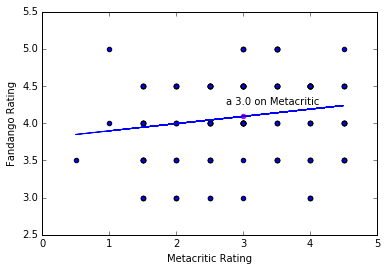

In [ ]:
plt.scatter(M,F)
plt.plot(M,M*slope+intercept)
plt.xlabel('Metacritic Rating')
plt.ylabel('Fandango Rating')
plt.scatter(3,pred_3,color="m")
plt.annotate('a 3.0 on Metacritic',\
    xy=(3,pred_3),xytext=(2.75, 4.25),\
             )
plt.show()